<a href="https://colab.research.google.com/github/sneha1012/Intelligent-Kitchen-Aid-for-the-Visually-Impaired/blob/main/Copy_of_NUS_Obj_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install ultralytics --upgrade

In [ ]:
!pip install pyttsx3
!sudo apt-get install espeak
!pip install gtts

In [ ]:
import os
import xml.etree.ElementTree as ET

def convert_voc_to_yolo(xml_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for xml_file in os.listdir(xml_folder):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(xml_folder, xml_file)
            output_path = os.path.join(output_folder, os.path.splitext(xml_file)[0] + '.txt')

            with open(xml_path, 'r') as f:
                tree = ET.parse(f)
                root = tree.getroot()

                img_width = int(root.find('size/width').text)
                img_height = int(root.find('size/height').text)

                with open(output_path, 'w') as out_file:
                    for obj in root.findall('object'):
                        class_id = obj.find('name').text

                        xmin = int(obj.find('bndbox/xmin').text)
                        ymin = int(obj.find('bndbox/ymin').text)
                        xmax = int(obj.find('bndbox/xmax').text)
                        ymax = int(obj.find('bndbox/ymax').text)

                        # YOLO format: class_id, normalized_x_center, normalized_y_center, normalized_width, normalized_height
                        x_center = (xmin + xmax) / (2.0 * img_width)
                        y_center = (ymin + ymax) / (2.0 * img_height)
                        width = (xmax - xmin) / img_width
                        height = (ymax - ymin) / img_height

                        out_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

def main():
    voc_xml_folder = '/content/drive/MyDrive/Dataset-20231113T035537Z-001/Labels/test'
    yolo_txt_output_folder = '/content/drive/MyDrive/Dataset-20231113T035537Z-001/Lables_yolo/test'

    convert_voc_to_yolo(voc_xml_folder, yolo_txt_output_folder)

if __name__ == "__main__":
    main()

In [ ]:
import os

def replace_class_names(file_path, class_mapping):
    # Read the contents of the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Replace class names with labels
    modified_lines = []
    for line in lines:
        parts = line.strip().split()
        if parts:
            class_name = parts[0]
            class_label = class_mapping.get(class_name)
            if class_label is not None:
                parts[0] = str(class_label)
                modified_lines.append(" ".join(parts) + "\n")
            else:
                modified_lines.append(line)

    # Write the modified contents back to the file
    with open(file_path, 'w') as file:
        file.writelines(modified_lines)

def process_folder(folder_path, class_mapping):
    # Iterate over all .txt files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            replace_class_names(file_path, class_mapping)
            print(f"Processed: {filename}")

# Example usage: Replace class names in all .txt files in the specified folder
folder_path = '/content/drive/MyDrive/Dataset-20231113T035537Z-001/labels/train'
class_mapping = {
        'coca_cola_glass_bottle': '1',
        'coffee_mate_french_vanilla': '2',
        'honey_bunches_of_oats_honey_roasted': '3',
        'hunts_sauce': '4',
        'mahatma_rice': '5',
        'nature_valley_soft_baked_oatmeal_squares_cinnamon_brown_sugar': '6',
        'nature_valley_sweet_and_salty_nut_almond': '7',
        'palmolive_orange': '8',
        'pop_secret_light_butter': '9',
        'pringles_bbq': '10',
        'red_bull': '11',
        'bowl_1': '12',
        'bowl_2': '13',
        'bowl_3': '14',
        'bowl_4': '15',
        'bowl_5': '16',
        'mug_1': '17',
        'mug_2': '18',
        'mug_3': '19',
        'mug_4': '20',
        'mug_5': '21',
        'salt_1': '22',
        'cleaner': '23'}
process_folder(folder_path, class_mapping)


In [ ]:
%%writefile kitchen_scenes.yaml
train: "/content/drive/MyDrive/Dataset01/images/train"
val: "/content/drive/MyDrive/Dataset01/images/val"

nc: 23
names: [
   'coca_cola_glass_bottle', 'coffee_mate_french_vanilla', 'honey_bunches_of_oats_honey_roasted',
    'hunts_sauce', 'mahatma_rice', 'nature_valley_soft_baked_oatmeal_squares_cinnamon_brown_sugar',
    'nature_valley_sweet_and_salty_nut_almond', 'palmolive_orange', 'pop_secret_light_butter',
    'pringles_bbq', 'red_bull', 'bowl_1', 'bowl_2', 'bowl_3', 'bowl_4', 'bowl_5',
    'mug_1', 'mug_2', 'mug_3', 'mug_4', 'mug_5', 'salt_1', 'cleaner'
]

Writing kitchen_scenes.yaml


In [ ]:
import torch

# Other parts of your code...

# Release GPU memory
torch.cuda.empty_cache()


In [ ]:
from ultralytics import YOLO

# Load the model.
model = YOLO('yolov8s.pt')

# Training.
results = model.train(
   data='/content/kitchen_scenes.yaml',
   imgsz=1920,
   epochs=50,
   batch=1,
   name='yolov8n_v8_50e'
)

run from here


image 1/1 /content/drive/MyDrive/Dataset01/images/val/rgb_125.png: 1088x1920 1 mahatma_rice, 1 nature_valley_sweet_and_salty_nut_almond, 1 cleaner, 52.1ms
Speed: 7.8ms preprocess, 52.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1088, 1920)


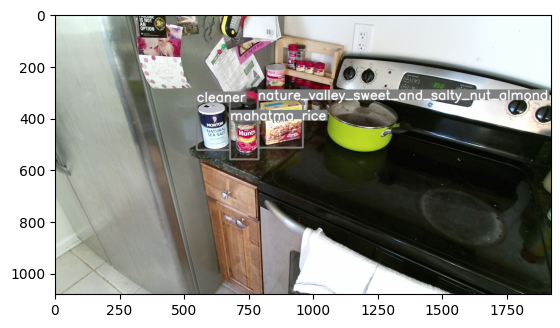

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from ultralytics.utils.plotting import Annotator

model_test = YOLO('/content/drive/MyDrive/Dataset01/best.pt')
# this is your model

test_results = model_test('/content/drive/MyDrive/Dataset01/images/val/rgb_125.png')

with open('/content/drive/MyDrive/Dataset01/names.txt', 'r') as f:
    class_names = [line.strip() for line in f]
img = cv2.imread('/content/drive/MyDrive/Dataset01/images/val/rgb_125.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

detected_objects = []

for r in test_results:
    annotator = Annotator(img_rgb)
    boxes = r.boxes
    for box in boxes:
        b = box.xyxy[0]
        c = box.cls
        annotator.box_label(b, model.names[int(c)])
        detected_objects.append(model.names[int(c)])
    img_rgb = annotator.result()


plt.imshow(img_rgb)
plt.show()

with open('/content/drive/MyDrive/Dataset01/detected_objects.txt', 'w') as f:
    for obj in detected_objects:
        f.write(obj + '\n')

In [ ]:
detected_objects

['nature_valley_sweet_and_salty_nut_almond', 'mahatma_rice', 'cleaner']

In [ ]:
import json

# Mapping of objects to actions
object_action_mappings = {
    "coca_cola_glass_bottle": ["serve cold", "make a cocktail"],
    "coffee_mate_french_vanilla": ["add to coffee", "make a dessert"],
    "honey_bunches_of_oats_honey_roasted": ["make a oats pie", "add those oats to milk to make smoothie"],
    "hunts_sauce": ["make curry", "put it in the sandwich", "put it on a beagel"],
    "mahatma_rice": ["make biryani", "serve hot"],
    "nature_valley_soft_baked_oatmeal_squares_cinnamon_brown_sugar": ["make caramel", "make chocolate using brown sugar", "add it in a pudding"],
    "Nature Valley Sweet and Salty Nut Almond": ["open it to eat", "share it ", "put it in the box"],
    "Palmolive Orange": ["scrub it", "pour it in a bowl", "inse it off the place"],
    "Pop Secret Light Butter": ["Microwave it", "shake it to check the quantity", "serve it with biscuits or bread"],
    "Pringles BBQ ": ["eat it", "put the box aside for later", "open it to add in the salad"],
    "Red Bull": ["open the can", "drink it", "mix it with whiskey"],
    "Bowl_1 ": ["clean the bowl", "pick it", "eat curry"],
    "bowl 2":  ["wash it"],
    "bowl 3": ["cover it"],
    "bowl 4": ["scrub it"],
    "bowl 5": ["eat rice"],
    "mug 1": ["drink tea", "drink coffee"],
    "mug 2": ["drink milk", "drink hot chocolate"],
    "salt": ["make eggs", "Make lemonade"]

}

# Writing JSON data to a file
with open('object_actions.json', 'w') as json_file:
    json.dump(object_action_mappings, json_file)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import random
from gtts import gTTS
import os
from IPython.display import Audio

def generate_suggestion(detected_objects, mappings):
    suggestions = []
    for obj in detected_objects:
        actions = mappings.get(obj, [])
        if actions:
            action = random.choice(actions)  # Randomly select an action
            suggestions.append(f"Would you like to {action} with {obj}?")
        # else:
        #     # suggestions.append(f"No actions found for {obj}.")

    return ' '.join(suggestions)

# Load your JSON data
with open('object_actions.json', 'r') as file:
    action_mappings = json.load(file)

# Assuming these objects are detected


# Generate suggestions
suggestions = generate_suggestion(detected_objects, action_mappings)
print(suggestions)


Would you like to serve hot with mahatma_rice?


In [ ]:
import pyttsx3
import json
import random

def generate_suggestion(detected_objects, mappings):
    suggestions = []
    for obj in detected_objects:
        actions = mappings.get(obj, [])
        if actions:
            action = random.choice(actions)  # Randomly select an action
            suggestions.append(f"Would you like to {action} with {obj}?")
        # else:
        #     suggestions.append(f"No actions found for {obj}.")

    return ' '.join(suggestions)

# Load your JSON data
with open('object_actions.json', 'r') as file:
    action_mappings = json.load(file)

# Assuming these objects are detected
# detected_objects = ["coca_cola_glass_bottle", "coffee_mate_french_vanilla"]

# Generate suggestions
suggestions = generate_suggestion(detected_objects, action_mappings)
print(suggestions)
suggestions = suggestions.replace("_"," ")



text = suggestions

# Specify the language
language = 'en'

# Slow=False means the speech will be generated quickly
tts = gTTS(text=text, lang=language, slow=False)

# Save the speech as a file
tts.save("example.mp3")
Audio("example.mp3", autoplay=True)

Would you like to make biryani with mahatma_rice?
